## 음주 여부에 따라 건강검진 수치 차이가 있을까?

## 신장과 허리 둘레 크기는 체중과 상관관계가 있을까?
* 분석을 통해 가설을 검정해보자.

## 라이브러리 로드

In [1]:
# 분석에 사용할 pandas, 수치 계산에 사용할 numpy, 시각화에 사용할 seaborn 불러오기
# 구 버전의 주피터 노트북에서는 %matplotlib inline 설정을 해야 노트북 안에서 그래프를 시각화할 수 있음
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

## 한글 폰트 설정

In [2]:
# # 윈도우 - Google Colab 사용 시
# !apt - qq -y install fonts-nanum > /dev/null
# import matplotlib.font-manager as fm
# fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
# font = fm.FontProperties(fname=fontpath, size=9)
# fm._rebuild()

# # Colab의 한글 폰트 설정
# plt.rc('font', family='NanumGothic')
# # 마이너스 폰트 깨지는 문제 대처
# plt.rc("axes", unicode_minus=False)

In [3]:
# 한글 폰트를 설정해주지 않으면 그래프 상에서 한글이 깨짐
# 운영체제별 설정을 위해 로드
import os

# 윈도우, 맥 외의 OS는 별도로 설정
if os.name == 'posix': # Mac
    plt.rc("font", family="AppleGothic")
else: 
    plt.fc("font", family="Malgun Gothic")

# 마이너스 폰트 깨지는 문제 대처
plt.rc("axes", unicode_minus=False)

In [4]:
# 레티나 설정해주면 글씨가 좀 더 선명하게 보임
# 폰트 주변이 흐릿하게 보이는 것 방지
%config InlineBackend.figure_format = 'retina'

## 데이터 불러오기
* 건강검진정보 : 2002년부터 2013년까지의
    * 국민건강보험의 직장가입자, 40세 이상 피부양자,40세 이상 가입자의 일반건강검진 결과
    * 일반건강검진 대상자 중 만 40세와 만 66세에 도달한 이들이 받는 생애전환기 건강진단 수검이력
    * 각 연도별 수진자 100만 명에 대한 기본정보(성, 연령대, 시도코드 등), 검진 내역(신장, 체중, 총콜레스테롤, 혈색소 등)으로 구성된 개방 데이터<br><br/>
* 공공데이터 개방 서비스에서 다운로드 받을 수 있음(http://nhiss.nhis.or.kr/op/it/index.do)
    * 건강검진정보(2017) 다운받기 : https://www.data.go.kr/dataset/15007122/fileData.do
    * 다른 년도 데이터로 실습 해도 되는데 인코딩과 컬럼명이 다르니 주의

In [5]:
# 다운로드 받은 파일을 판다스의 read_csv를 통해 읽어오기
# 파일을 읽어온 후 shape로 행과 열의 수 출력하기
df = pd.read_csv("data/NHIS_OPEN_GJ_2017_v1.1.csv", encoding="cp949")
df.shape

(1000000, 34)

### 데이터 미리보기

In [6]:
# head : 위에서 5개
df.head()

,기준년도,가입자일련번호,성별코드,연령대코드(5세단위),시도코드,신장(5Cm단위),체중(5Kg단위),허리둘레,시력(좌),시력(우),...,감마지티피,흡연상태,음주여부,구강검진수검여부,치아우식증유무,결손치유무,치아마모증유무,제3대구치(사랑니)이상,치석,데이터공개일자
0,2017,1,1,8,43,170,75,90.0,1.0,1.0,...,40.0,1.0,Y,Y,NaN,NaN,NaN,NaN,Y,2018-11-26
1,2017,2,1,7,11,180,80,89.0,0.9,1.2,...,27.0,3.0,N,Y,NaN,NaN,NaN,NaN,NaN,2018-11-26
2,2017,3,1,9,41,165,75,91.0,1.2,1.5,...,68.0,1.0,N,N,NaN,NaN,NaN,NaN,NaN,2018-11-26
3,2017,4,1,11,48,175,80,91.0,1.5,1.2,...,18.0,1.0,N,Y,NaN,NaN,NaN,NaN,N,2018-11-26
4,2017,5,1,11,30,165,60,80.0,1.0,1.2,...,25.0,1.0,N,Y,NaN,NaN,NaN,NaN,N,2018-11-26


In [7]:
# tail : 아래에서 5개
df.tail()

,기준년도,가입자일련번호,성별코드,연령대코드(5세단위),시도코드,신장(5Cm단위),체중(5Kg단위),허리둘레,시력(좌),시력(우),...,감마지티피,흡연상태,음주여부,구강검진수검여부,치아우식증유무,결손치유무,치아마모증유무,제3대구치(사랑니)이상,치석,데이터공개일자
999995,2017,999996,1,10,48,175,80,92.1,1.5,1.5,...,27.0,1.0,N,N,NaN,NaN,NaN,NaN,NaN,2018-11-26
999996,2017,999997,1,8,41,170,75,86.0,1.0,1.5,...,15.0,1.0,N,N,NaN,NaN,NaN,NaN,NaN,2018-11-26
999997,2017,999998,2,9,26,155,50,68.0,1.0,0.7,...,17.0,3.0,Y,N,NaN,NaN,NaN,NaN,NaN,2018-11-26
999998,2017,999999,1,6,29,175,60,72.0,1.5,1.0,...,17.0,1.0,N,N,NaN,NaN,NaN,NaN,NaN,2018-11-26
999999,2017,1000000,1,11,41,160,70,90.5,1.0,1.5,...,36.0,3.0,Y,N,NaN,NaN,NaN,NaN,NaN,2018-11-26


In [8]:
# sample : 랜덤 추출,  기본 1개
df.sample()

,기준년도,가입자일련번호,성별코드,연령대코드(5세단위),시도코드,신장(5Cm단위),체중(5Kg단위),허리둘레,시력(좌),시력(우),...,감마지티피,흡연상태,음주여부,구강검진수검여부,치아우식증유무,결손치유무,치아마모증유무,제3대구치(사랑니)이상,치석,데이터공개일자
879159,2017,879160,1,11,47,165,60,81.1,1.5,1.2,...,26.0,1.0,N,Y,NaN,NaN,NaN,NaN,N,2018-11-26


## 기본 정보 보기

In [9]:
# info : 데이터의 크기, 형식, 메모리 사용량 등
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 34 columns):
 #   Column        Non-Null Count    Dtype  
---  ------        --------------    -----  
 0   기준년도          1000000 non-null  int64  
 1   가입자일련번호       1000000 non-null  int64  
 2   성별코드          1000000 non-null  int64  
 3   연령대코드(5세단위)   1000000 non-null  int64  
 4   시도코드          1000000 non-null  int64  
 5   신장(5Cm단위)     1000000 non-null  int64  
 6   체중(5Kg단위)     1000000 non-null  int64  
 7   허리둘레          999734 non-null   float64
 8   시력(좌)         999817 non-null   float64
 9   시력(우)         999811 non-null   float64
 10  청력(좌)         999842 non-null   float64
 11  청력(우)         999844 non-null   float64
 12  수축기혈압         999981 non-null   float64
 13  이완기혈압         999982 non-null   float64
 14  식전혈당(공복혈당)    999958 non-null   float64
 15  총콜레스테롤        999957 non-null   float64
 16  트리글리세라이드      999955 non-null   float64
 17  HDL콜레스테롤      999956 non-nul

In [10]:
# 컬럼의 수가 많음. 컬럼만 따로 출력하기
df.columns

Index(['기준년도', '가입자일련번호', '성별코드', '연령대코드(5세단위)', '시도코드', '신장(5Cm단위)',
       '체중(5Kg단위)', '허리둘레', '시력(좌)', '시력(우)', '청력(좌)', '청력(우)', '수축기혈압',
       '이완기혈압', '식전혈당(공복혈당)', '총콜레스테롤', '트리글리세라이드', 'HDL콜레스테롤', 'LDL콜레스테롤',
       '혈색소', '요단백', '혈청크레아티닌', '(혈청지오티)AST', '(혈청지오티)ALT', '감마지티피', '흡연상태',
       '음주여부', '구강검진수검여부', '치아우식증유무', '결손치유무', '치아마모증유무', '제3대구치(사랑니)이상', '치석',
       '데이터공개일자'],
      dtype='object')

In [11]:
# dtypes : 데이터 형식만 출력
df.dtypes

기준년도              int64
가입자일련번호           int64
성별코드              int64
연령대코드(5세단위)       int64
시도코드              int64
신장(5Cm단위)         int64
체중(5Kg단위)         int64
허리둘레            float64
시력(좌)           float64
시력(우)           float64
청력(좌)           float64
청력(우)           float64
수축기혈압           float64
이완기혈압           float64
식전혈당(공복혈당)      float64
총콜레스테롤          float64
트리글리세라이드        float64
HDL콜레스테롤        float64
LDL콜레스테롤        float64
혈색소             float64
요단백             float64
혈청크레아티닌         float64
(혈청지오티)AST      float64
(혈청지오티)ALT      float64
감마지티피           float64
흡연상태            float64
음주여부             object
구강검진수검여부         object
치아우식증유무         float64
결손치유무           float64
치아마모증유무         float64
제3대구치(사랑니)이상    float64
치석               object
데이터공개일자          object
dtype: object

## 결측치 보기

In [12]:
True + True + False

2

In [13]:
# isnull : 결측치를 bool 값으로 표시하고 sum을 하면 컬럼마다 결측치 수 세어줌
df.isnull().sum()

기준년도                  0
가입자일련번호               0
성별코드                  0
연령대코드(5세단위)           0
시도코드                  0
신장(5Cm단위)             0
체중(5Kg단위)             0
허리둘레                266
시력(좌)               183
시력(우)               189
청력(좌)               158
청력(우)               156
수축기혈압                19
이완기혈압                18
식전혈당(공복혈당)           42
총콜레스테롤               43
트리글리세라이드             45
HDL콜레스테롤             44
LDL콜레스테롤           2912
혈색소                  52
요단백                4592
혈청크레아티닌              43
(혈청지오티)AST           41
(혈청지오티)ALT           42
감마지티피                42
흡연상태                144
음주여부                536
구강검진수검여부              0
치아우식증유무         1000000
결손치유무           1000000
치아마모증유무         1000000
제3대구치(사랑니)이상    1000000
치석               621422
데이터공개일자               0
dtype: int64

In [14]:
# isna : 결측치 여부를 확인하고 sum을 통해 결측치 수 집계 가능
df.isna().sum()

기준년도                  0
가입자일련번호               0
성별코드                  0
연령대코드(5세단위)           0
시도코드                  0
신장(5Cm단위)             0
체중(5Kg단위)             0
허리둘레                266
시력(좌)               183
시력(우)               189
청력(좌)               158
청력(우)               156
수축기혈압                19
이완기혈압                18
식전혈당(공복혈당)           42
총콜레스테롤               43
트리글리세라이드             45
HDL콜레스테롤             44
LDL콜레스테롤           2912
혈색소                  52
요단백                4592
혈청크레아티닌              43
(혈청지오티)AST           41
(혈청지오티)ALT           42
감마지티피                42
흡연상태                144
음주여부                536
구강검진수검여부              0
치아우식증유무         1000000
결손치유무           1000000
치아마모증유무         1000000
제3대구치(사랑니)이상    1000000
치석               621422
데이터공개일자               0
dtype: int64

<Axes: >

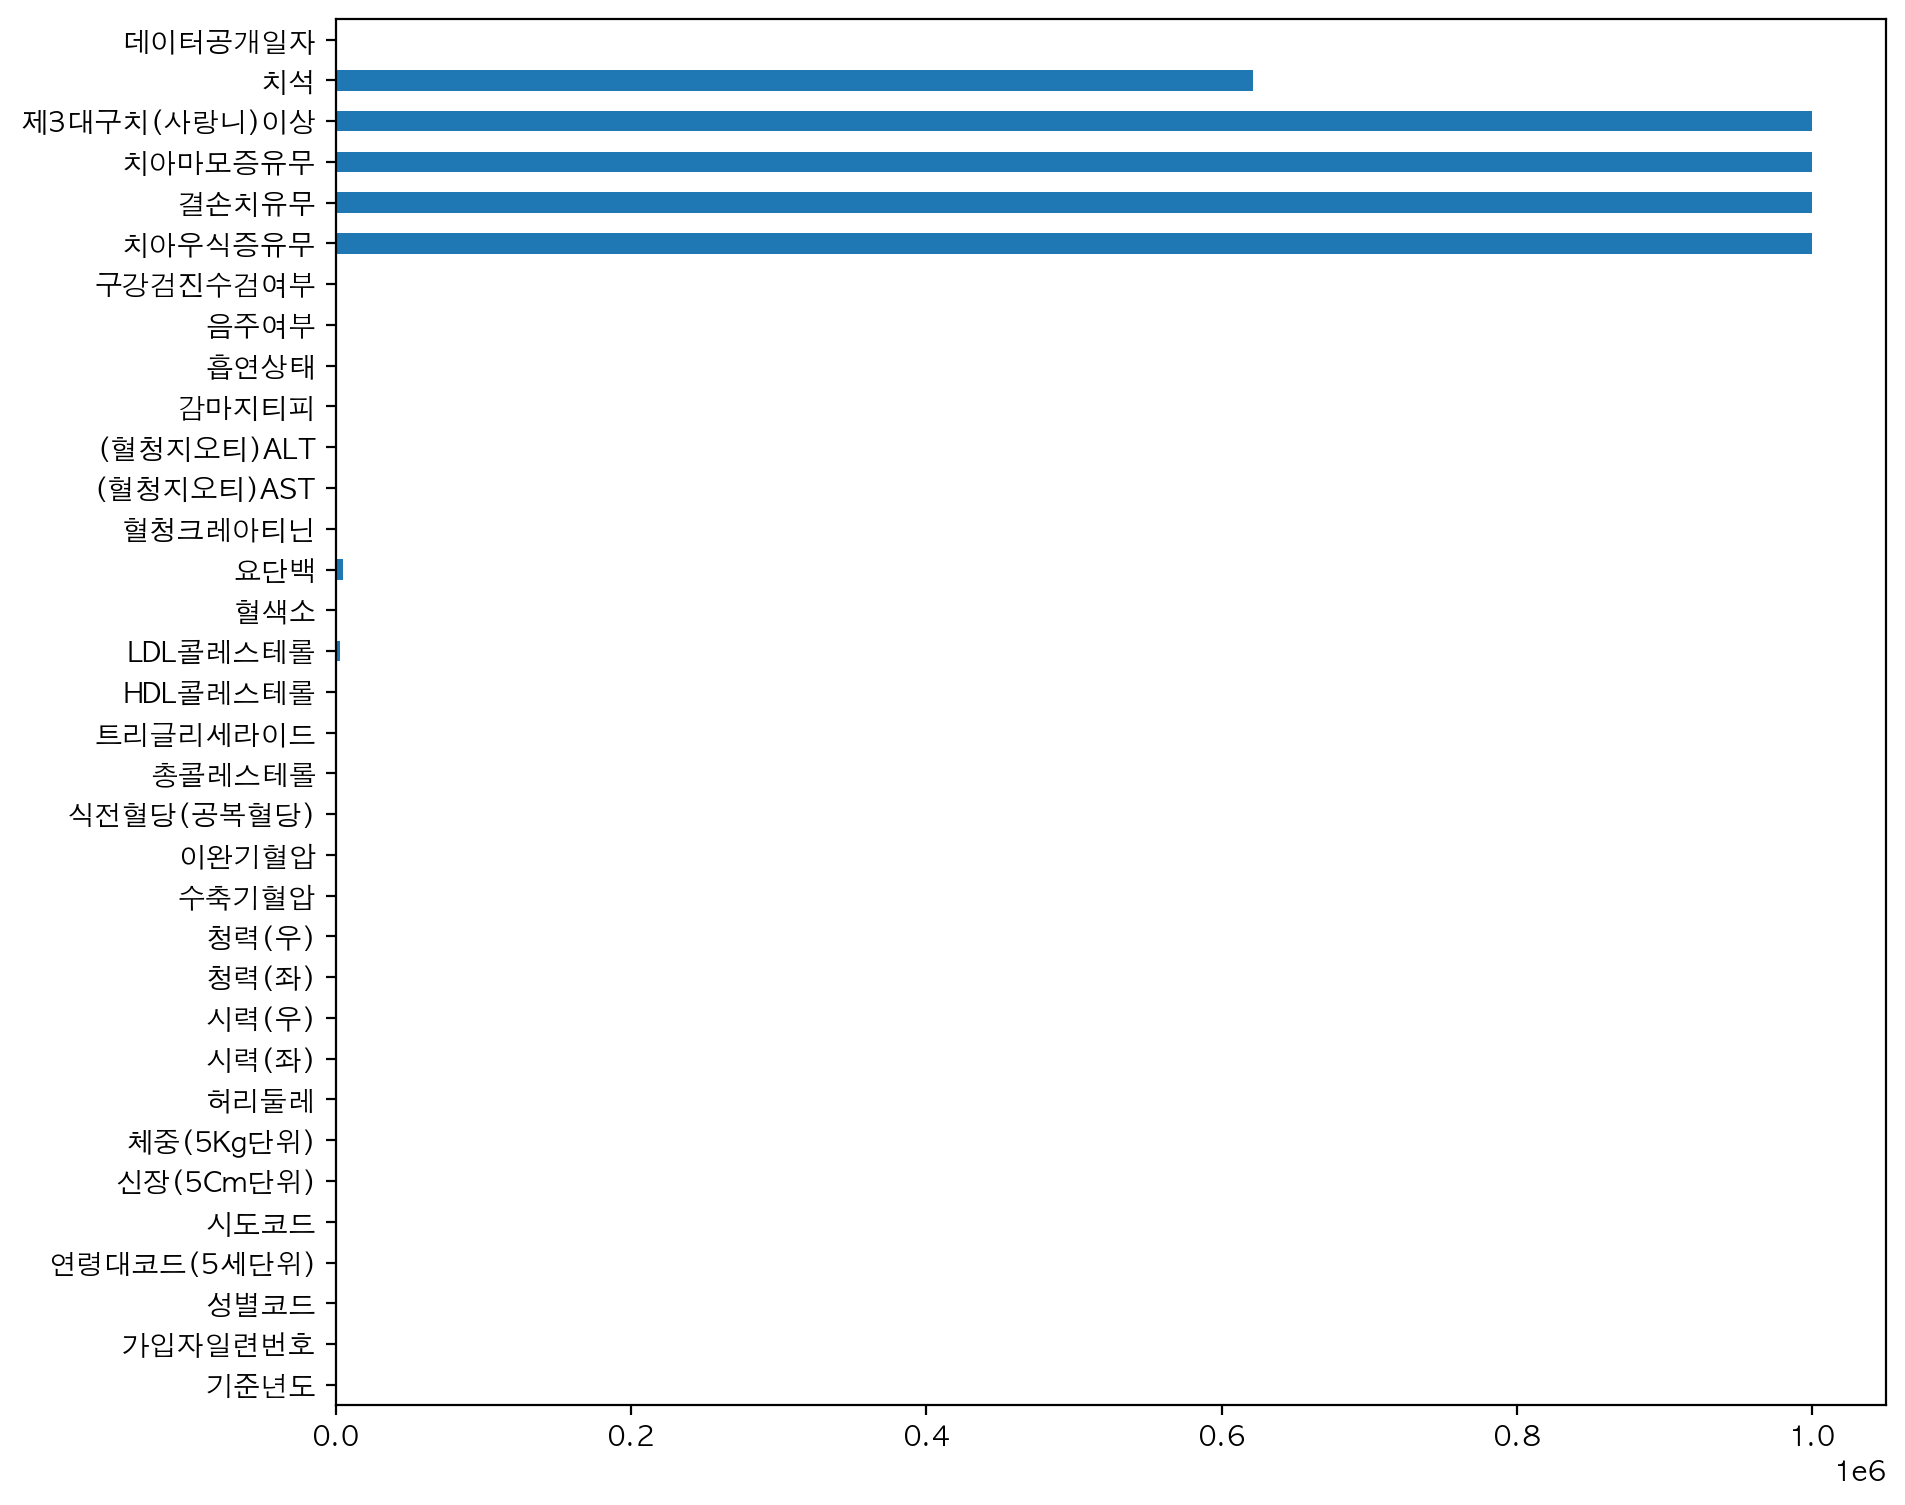

In [15]:
# 판다스에 내장된 plot을 통해 시각화
df.isnull().sum().plot.barh(figsize=(10, 9))

## 일부 데이터 요약하기

In [16]:
df.columns

Index(['기준년도', '가입자일련번호', '성별코드', '연령대코드(5세단위)', '시도코드', '신장(5Cm단위)',
       '체중(5Kg단위)', '허리둘레', '시력(좌)', '시력(우)', '청력(좌)', '청력(우)', '수축기혈압',
       '이완기혈압', '식전혈당(공복혈당)', '총콜레스테롤', '트리글리세라이드', 'HDL콜레스테롤', 'LDL콜레스테롤',
       '혈색소', '요단백', '혈청크레아티닌', '(혈청지오티)AST', '(혈청지오티)ALT', '감마지티피', '흡연상태',
       '음주여부', '구강검진수검여부', '치아우식증유무', '결손치유무', '치아마모증유무', '제3대구치(사랑니)이상', '치석',
       '데이터공개일자'],
      dtype='object')

In [17]:
# 여러 컬럼 가져오기 : [] list
# "(혈청지오티)ALT", "(혈청지오티)AST"를 가져와서 미리보기 하기
df[["(혈청지오티)ALT", "(혈청지오티)AST"]].head()

,(혈청지오티)ALT,(혈청지오티)AST
0,35.0,21.0
1,36.0,20.0
2,32.0,47.0
3,34.0,29.0
4,12.0,19.0


In [18]:
# "(혈청지오티)ALT", "(혈청지오티)AST"를 요약하기
df[["(혈청지오티)ALT", "(혈청지오티)AST"]].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 2 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   (혈청지오티)ALT  999958 non-null  float64
 1   (혈청지오티)AST  999959 non-null  float64
dtypes: float64(2)
memory usage: 15.3 MB


In [19]:
df[["(혈청지오티)ALT", "(혈청지오티)AST"]].describe()

,(혈청지오티)ALT,(혈청지오티)AST
count,999958.000000,999959.000000
mean,25.749509,25.994671
std,26.294770,23.587469
min,1.000000,1.000000
25%,15.000000,19.000000
50%,20.000000,23.000000
75%,29.000000,28.000000
max,7210.000000,9999.000000


## value_counts로 값 집계하기

In [20]:
# value_counts를 통해 : 성별코드로 그룹화하고 개수 집계
df["성별코드"].value_counts()

성별코드
1    530410
2    469590
Name: count, dtype: int64

In [21]:
# value_counts를 통해 : 흡연상태로 그룹화하고 개수 집계
df["흡연상태"].value_counts()

흡연상태
1.0    607942
3.0    215702
2.0    176212
Name: count, dtype: int64

## groupby와 pivot_table 사용하기

### groupby

In [22]:
# groupby를 통해 : 데이터를 그룹화하기
# 성별코드로 그룹화 한 데이터 세보기
df.groupby(["성별코드"])["가입자일련번호"].count()

성별코드
1    530410
2    469590
Name: 가입자일련번호, dtype: int64

In [23]:
# 성별코드와 음주여부로 그룹화를 하고 개수 세보기
df.groupby(["성별코드", "음주여부"])["가입자일련번호"].count()

성별코드  음주여부
1     N       173612
      Y       356587
2     N       326827
      Y       142438
Name: 가입자일련번호, dtype: int64

In [24]:
# 성별코드와 음주여부로 그룹화를 하고 감마지티피티의 평균 구하기
df.groupby(["성별코드", "음주여부"])["감마지티피"].mean()

성별코드  음주여부
1     N       34.739868
      Y       56.610981
2     N       22.612408
      Y       25.001018
Name: 감마지티피, dtype: float64

In [25]:
# 성별코드와 음주여부로 그룹화를 하고 감마지티피티의 요약수치 구하기
df.groupby(["성별코드", "음주여부"])["감마지티피"].describe()

count       mean        std  min   25%   50%   75%    max
성별코드 음주여부                                                              
1    N     173604.0  34.739868  37.606197  1.0  18.0  25.0  38.0  999.0
     Y     356576.0  56.610981  68.851128  1.0  24.0  37.0  63.0  999.0
2    N     326813.0  22.612408  25.203579  1.0  13.0  17.0  24.0  999.0
     Y     142429.0  25.001018  36.725100  1.0  13.0  17.0  25.0  999.0

In [26]:
# agg를 사용하면 : 여러 수치를 함께 구할 수 있음
df.groupby(["성별코드", "음주여부"])["감마지티피"].agg(["count", "mean", "median"])

count       mean  median
성별코드 음주여부                           
1    N     173604  34.739868    25.0
     Y     356576  56.610981    37.0
2    N     326813  22.612408    17.0
     Y     142429  25.001018    17.0

### pivot_table
* https://pandas.pydata.org/docs/reference/api/pandas.pivot_table.html

In [27]:
# 음주여부에 따른 그룹화된 수를 피봇 테이블로 구하기
df.pivot_table(index="음주여부", values="가입자일련번호", aggfunc="count")

,가입자일련번호
음주여부,
N,500439
Y,499025


In [33]:
# 음주여부에 따른 감마지티피의 평균 구하기
pd.pivot_table(df, index="음주여부", values="감마지티피")

,감마지티피
음주여부,
N,26.819650
Y,47.588675


In [35]:
# 기본값은 평균을 구하지만 aggfunc을 통해 지정해줄 수도 있음
pd.pivot_table(df, index="음주여부", values="감마지티피", aggfunc=["mean"])

,mean
,감마지티피
음주여부,
N,26.819650
Y,47.588675


In [36]:
# aggfunc에 여러 값을 한 번에 지정할 수도 있음
pd.pivot_table(df, index="음주여부", values="감마지티피",
               aggfunc=["mean", "median"])

,mean,median
,감마지티피,감마지티피
음주여부,,
N,26.819650,19.0
Y,47.588675,30.0


In [41]:
# aggfunc에 describe를 사용해서 통계요약값을 한 번에 볼 수도 있음
pd.pivot_table(df, index="음주여부", values="감마지티피",
               aggfunc="describe")

,25%,50%,75%,count,max,mean,min,std
음주여부,,,,,,,,
N,14.0,19.0,29.0,500417.0,999.0,26.819650,1.0,30.639714
Y,18.0,30.0,52.0,499005.0,999.0,47.588675,1.0,63.056912


In [42]:
# 성별코드, 음주여부에 따른 감마지티피 값의 평균 구하기
pd.pivot_table(df, index=["성별코드", "음주여부"], values="감마지티피",
               aggfunc="describe")

25%   50%   75%     count    max       mean  min        std
성별코드 음주여부                                                              
1    N     18.0  25.0  38.0  173604.0  999.0  34.739868  1.0  37.606197
     Y     24.0  37.0  63.0  356576.0  999.0  56.610981  1.0  68.851128
2    N     13.0  17.0  24.0  326813.0  999.0  22.612408  1.0  25.203579
     Y     13.0  17.0  25.0  142429.0  999.0  25.001018  1.0  36.725100

## 전체 데이터 시각화하기